In [1]:
import os
import csv
import numpy as np
import allan_variance
# from av import allan_variance, params_from_avar

import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(0)

/home/su/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
IMU1_path = '../data/Flight_hardware/stochastic_cal_DB1.csv'
IMU2_path = '../data/Flight_hardware/stochastic_cal_DB2.csv'
IMU3_path = '../data/Flight_hardware/stochastic_cal_DB3.csv'
IMU4_path = '../data/Flight_hardware/stochastic_cal_DB4.csv'
IMU5_path = '../data/Flight_hardware/stochastic_cal_DB5.csv'
IMU6_path = '../data/Flight_hardware/stochastic_cal_DB6.csv'

df1 = pd.read_csv(IMU1_path)
df2 = pd.read_csv(IMU2_path)
df3 = pd.read_csv(IMU3_path)
df4 = pd.read_csv(IMU4_path)
df5 = pd.read_csv(IMU5_path)
df6 = pd.read_csv(IMU6_path)

In [3]:
dt = 0.002

df1_gx = np.array(df1['gx'])
df1_gy = np.array(df1['gy'])
df1_gz = np.array(df1['gz'])
df1_ax = np.array(df1['ax'])
df1_ay = np.array(df1['ay'])
df1_az = np.array(df1['az'])

df2_gx = np.array(df2['gx'])
df2_gy = np.array(df2['gy'])
df2_gz = np.array(df2['gz'])
df2_ax = np.array(df2['ax'])
df2_ay = np.array(df2['ay'])
df2_az = np.array(df2['az'])

df3_gx = np.array(df3['gx'])
df3_gy = np.array(df3['gy'])
df3_gz = np.array(df3['gz'])
df3_ax = np.array(df3['ax'])
df3_ay = np.array(df3['ay'])
df3_az = np.array(df3['az'])
  
df4_gx = np.array(df4['gx'])
df4_gy = np.array(df4['gy'])
df4_gz = np.array(df4['gz'])
df4_ax = np.array(df4['ax'])
df4_ay = np.array(df4['ay'])
df4_az = np.array(df4['az'])

df5_gx = np.array(df5['gx'])
df5_gy = np.array(df5['gy'])
df5_gz = np.array(df5['gz'])
df5_ax = np.array(df5['ax'])
df5_ay = np.array(df5['ay'])
df5_az = np.array(df5['az'])

df6_gx = np.array(df6['gx'])
df6_gy = np.array(df6['gy'])
df6_gz = np.array(df6['gz'])
df6_ax = np.array(df6['ax'])
df6_ay = np.array(df6['ay'])
df6_az = np.array(df6['az'])

IMU_1 SF hat: quantization    0.00000000000000
white           0.00573692766319
flicker         0.00302294973418
walk            0.00000000000000
ramp            0.00000000000000
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00549650831198
flicker         0.00283533133293
walk            0.00069934608351
ramp            0.00000000000000
Name: 0, dtype: float64, quantization    0.00000000000000
white           0.00559845347549
flicker         0.00169104298745
walk            0.00000000000000
ramp            0.00004878672686
Name: 0, dtype: float64


Text(0, 0.5, 'Allan Variance ($\\hat{\\omega}$)')

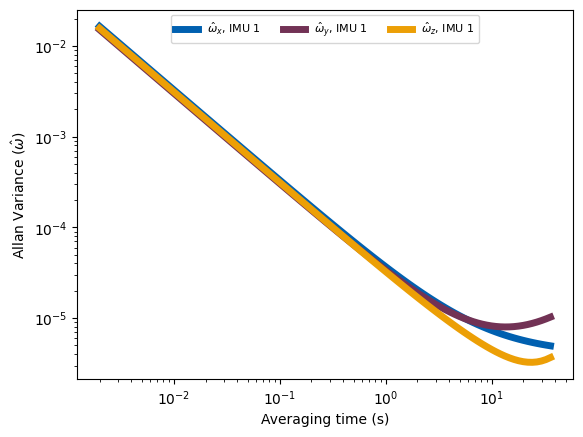

In [4]:
# individual IMUs, omega hat
fig, ax = plt.subplots()
tau_wx, avar_wx = allan_variance.compute_avar(df1_gx[10000:190000], dt)
tau_wy, avar_wy = allan_variance.compute_avar(df1_gy[10000:190000], dt)
tau_wz, avar_wz = allan_variance.compute_avar(df1_gz[10000:190000], dt)
params_wx, avar_pred_wx = allan_variance.estimate_parameters(tau_wx, avar_wx)
params_wy, avar_pred_wy = allan_variance.estimate_parameters(tau_wy, avar_wy)
params_wz, avar_pred_wz = allan_variance.estimate_parameters(tau_wz, avar_wz)
print(f"IMU_1 SF hat: {params_wx}, {params_wy}, {params_wz}")

# Estimated
plt.loglog(tau_wx, avar_pred_wx, '-', label="$\hat{\omega}_x$"+f", IMU 1", linewidth=5, color = "#0060B0")
plt.loglog(tau_wy, avar_pred_wy, '-', label="$\hat{\omega}_y$"+f", IMU 1", linewidth=5, color = "#723255")
plt.loglog(tau_wz, avar_pred_wz, '-', label="$\hat{\omega}_z$"+f", IMU 1", linewidth=5, color = "#EC9F06")

# ax.set_ylim([0.00000001, 0.01])
plt.legend(ncol=3, fancybox=True, frameon=True, fontsize=8, loc='upper center')
plt.xlabel("Averaging time (s)")
plt.ylabel("Allan Variance ($\hat{\omega}$)")